In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
seeds = np.arange(100)
random_state=42
n_features = 63

In [3]:
data = pd.read_csv('..\\Data\\ze41_mol_desc_db_red.csv', header=0, sep=';', decimal=',')

In [4]:
col_names = data.columns
X = data[col_names[3:]]
y = data[col_names[1]]

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=random_state)
[X_train, X_valid, y_train, y_valid] = [pd.DataFrame(x) for x in [X_train, X_valid, y_train, y_valid]]

In [6]:
scalex = MinMaxScaler(feature_range=(-1,1))
scalex.fit(X_train)
[X_train_sc, X_valid_sc] = [pd.DataFrame(scalex.transform(x), columns=X.columns) for x in [X_train, X_valid]]

In [7]:
scaley = MinMaxScaler(feature_range=(0, 1))
scaley.fit(y_train)
[y_train_sc, y_valid_sc] = [pd.DataFrame(scaley.transform(y), columns=y.columns) for y in [y_train, y_valid]]

In [8]:
all_scores = []

In [9]:
i = 0
for seed in seeds:
    i += 1
    rng = np.random.default_rng(seed=seed)
    for run in range(1):
        perm = rng.permutation(len(X_train_sc.columns))
        X_perm = X_train_sc[X_train_sc.columns[perm]]
        skb = SelectKBest(f_regression, k=n_features)
        _ = skb.fit_transform(X_perm, np.ravel(y_train_sc))
        _, scores_sorted = zip(*sorted(zip(X_perm.columns, skb.scores_), reverse=True))
        all_scores.append(scores_sorted)
    #print('{}% done'.format(i*100//len(seeds)))

In [10]:
cls, scores_sorted = zip(*sorted(zip(X_perm.columns, skb.scores_), reverse=True))

In [11]:
scores = pd.DataFrame(all_scores)
scores.columns = cls

In [12]:
avgs = scores.mean(axis=0)
avgs

rGes          0.023238
piPC05        4.093930
piPC04        3.338334
piPC03        3.977448
nTriazoles    0.633448
                ...   
AMW           5.724002
ALOGP2        0.525755
ALOGP         1.602371
AECC          0.336612
AAC           0.687950
Length: 1260, dtype: float64

In [13]:
s = avgs.sort_values(ascending=False)
s.index[:63]

Index(['CATS2D_03_AP', 'CATS3D_03_AP', 'CATS3D_02_AP', 'LUMO / eV',
       'P_VSA_MR_5', 'P_VSA_LogP_2', 'CATS2D_02_PN', 'CATS2D_03_DP', 'H3m',
       'nRNH2', 'H%', 'Mor14u', 'CATS2D_03_AN', 'Eta_epsi_5', 'CATS3D_03_DP',
       'P_VSA_e_3', 'Mor19m', 'Mv', 'Mor12e', 'B02[C-N]', 'Eta_F_A', 'R2e+',
       'Mor14s', 'NssCH2', 'Mor32m', 'SHED_AP', 'P_VSA_ppp_con', 'Mor14v',
       'Mor08s', 'E2m', 'SPH', 'MATS7m', 'F03[N-O]', 'SsNH2', 'CATS3D_04_NL',
       'E3p', 'Hlgap / eV', 'CATS2D_04_AA', 'Mor08i', 'HOMO / eV', 'TDB03e',
       'TDB02e', 'B03[N-O]', 'CATS3D_02_AN', 'Mi', 'Mor27m', 'TDB04v', 'ZM2V',
       'Mor12p', 'Eta_FL_A', 'GATS1m', 'Ui', 'Mor12m', 'SHED_PN', 'SHED_DP',
       'GATS1v', 'MLOGP', 'MPC07', 'nN', 'DLS_05', 'nArCOOH', 'Mor08p',
       'SpPosA_B(e)'],
      dtype='object')

In [14]:
avgs[s.index[62]], s.index[62]

(6.301375180856465, 'SpPosA_B(e)')

In [15]:
scores.std(axis=0).max()

1.0711834781949522e-14

In [16]:
scores

,rGes,piPC05,piPC04,piPC03,nTriazoles,nTA,nROR,nROH,nRNR2,nRNHR,...,ATS4e,ATS3v,ATS3s,ATS2s,ARR,AMW,ALOGP2,ALOGP,AECC,AAC
0,0.023238,4.09393,3.338334,3.977448,0.633448,0.270276,2.414028,1.518932,1.699586,0.994642,...,0.200476,0.190591,0.425854,1.497478,1.862228,5.724002,0.525755,1.602371,0.336612,0.68795
1,0.023238,4.09393,3.338334,3.977448,0.633448,0.270276,2.414028,1.518932,1.699586,0.994642,...,0.200476,0.190591,0.425854,1.497478,1.862228,5.724002,0.525755,1.602371,0.336612,0.68795
2,0.023238,4.09393,3.338334,3.977448,0.633448,0.270276,2.414028,1.518932,1.699586,0.994642,...,0.200476,0.190591,0.425854,1.497478,1.862228,5.724002,0.525755,1.602371,0.336612,0.68795
3,0.023238,4.09393,3.338334,3.977448,0.633448,0.270276,2.414028,1.518932,1.699586,0.994642,...,0.200476,0.190591,0.425854,1.497478,1.862228,5.724002,0.525755,1.602371,0.336612,0.68795
4,0.023238,4.09393,3.338334,3.977448,0.633448,0.270276,2.414028,1.518932,1.699586,0.994642,...,0.200476,0.190591,0.425854,1.497478,1.862228,5.724002,0.525755,1.602371,0.336612,0.68795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.023238,4.09393,3.338334,3.977448,0.633448,0.270276,2.414028,1.518932,1.699586,0.994642,...,0.200476,0.190591,0.425854,1.497478,1.862228,5.724002,0.525755,1.602371,0.336612,0.68795
96,0.023238,4.09393,3.338334,3.977448,0.633448,0.270276,2.414028,1.518932,1.699586,0.994642,...,0.200476,0.190591,0.425854,1.497478,1.862228,5.724002,0.525755,1.602371,0.336612,0.68795
97,0.023238,4.09393,3.338334,3.977448,0.633448,0.270276,2.414028,1.518932,1.699586,0.994642,...,0.200476,0.190591,0.425854,1.497478,1.862228,5.724002,0.525755,1.602371,0.336612,0.68795
98,0.023238,4.09393,3.338334,3.977448,0.633448,0.270276,2.414028,1.518932,1.699586,0.994642,...,0.200476,0.190591,0.425854,1.497478,1.862228,5.724002,0.525755,1.602371,0.336612,0.68795


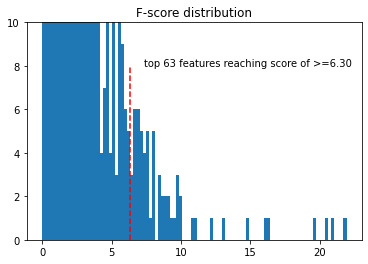

In [17]:
t63 = avgs[s.index[62]]
fig, ax = plt.subplots()
plt.hist(np.array(scores_sorted),bins=100)
ax.plot([t63, t63], [0, 8], 'r--')
ax.annotate('top 63 features reaching score of >={:.2f}'.format(t63), xy=(t63+1, 8), xytext=(t63+1, 8))
plt.title('F-score distribution', fontsize=12)
#plt.xlabel('Feature importance score')
#plt.ylabel('Number of features')
plt.ylim(top=10)
plt.savefig('..\\figures\\anova_hist_cropped.svg', format='svg')
plt.show()

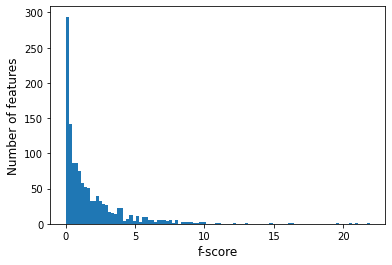

In [18]:
fig, ax = plt.subplots()
plt.hist(np.array(scores_sorted),bins=100)
#plt.title('Feature importance score distribution')
plt.xlabel('f-score', fontsize=12)
plt.ylabel('Number of features', fontsize=12)
plt.savefig('..\\figures\\anova_hist.svg', format='svg')
plt.show()

In [19]:
for i in range(63):
    nam = ''
    for x in s.index[i]:
        if x == '_':
            nam += '\\'
        nam += x
    print('{} & {} \\\\'.format(i+1, nam))

1 & CATS2D\_03\_AP \\
2 & CATS3D\_03\_AP \\
3 & CATS3D\_02\_AP \\
4 & LUMO / eV \\
5 & P\_VSA\_MR\_5 \\
6 & P\_VSA\_LogP\_2 \\
7 & CATS2D\_02\_PN \\
8 & CATS2D\_03\_DP \\
9 & H3m \\
10 & nRNH2 \\
11 & H% \\
12 & Mor14u \\
13 & CATS2D\_03\_AN \\
14 & Eta\_epsi\_5 \\
15 & CATS3D\_03\_DP \\
16 & P\_VSA\_e\_3 \\
17 & Mor19m \\
18 & Mv \\
19 & Mor12e \\
20 & B02[C-N] \\
21 & Eta\_F\_A \\
22 & R2e+ \\
23 & Mor14s \\
24 & NssCH2 \\
25 & Mor32m \\
26 & SHED\_AP \\
27 & P\_VSA\_ppp\_con \\
28 & Mor14v \\
29 & Mor08s \\
30 & E2m \\
31 & SPH \\
32 & MATS7m \\
33 & F03[N-O] \\
34 & SsNH2 \\
35 & CATS3D\_04\_NL \\
36 & E3p \\
37 & Hlgap / eV \\
38 & CATS2D\_04\_AA \\
39 & Mor08i \\
40 & HOMO / eV \\
41 & TDB03e \\
42 & TDB02e \\
43 & B03[N-O] \\
44 & CATS3D\_02\_AN \\
45 & Mi \\
46 & Mor27m \\
47 & TDB04v \\
48 & ZM2V \\
49 & Mor12p \\
50 & Eta\_FL\_A \\
51 & GATS1m \\
52 & Ui \\
53 & Mor12m \\
54 & SHED\_PN \\
55 & SHED\_DP \\
56 & GATS1v \\
57 & MLOGP \\
58 & MPC07 \\
59 & nN \\
60 & DLS\_05 \\
6

In [20]:
avgs[avgs>=10]

nRNH2           11.037985
P_VSA_MR_5      16.379314
P_VSA_LogP_2    16.073146
LUMO / eV       19.660711
H3m             12.083735
H%              10.781441
CATS3D_03_AP    20.938861
CATS3D_02_AP    20.541342
CATS2D_03_DP    13.096912
CATS2D_03_AP    21.921351
CATS2D_02_PN    14.885438
dtype: float64

In [21]:
cls, pval_sorted = zip(*sorted(zip(X_perm.columns, skb.pvalues_), reverse=True))

In [22]:
pval = pd.Series(pval_sorted, index=cls)

In [23]:
p =pval.sort_values(ascending=False)

In [24]:
p[p < 0.05]

ATSC2m          0.049037
GATS6m          0.048982
DLS_04          0.048880
C-002           0.048794
Mor08v          0.048771
                  ...   
P_VSA_MR_5      0.000173
LUMO / eV       0.000048
CATS3D_02_AP    0.000035
CATS3D_03_AP    0.000030
CATS2D_03_AP    0.000021
Length: 142, dtype: float64

In [25]:
s[s.index[:143]]

CATS2D_03_AP     21.921351
CATS3D_03_AP     20.938861
CATS3D_02_AP     20.541342
LUMO / eV        19.660711
P_VSA_MR_5       16.379314
                   ...    
C-002             4.071221
DLS_04            4.067992
GATS6m            4.064199
ATSC2m            4.062131
Eig11_AEA(ed)     4.023443
Length: 143, dtype: float64

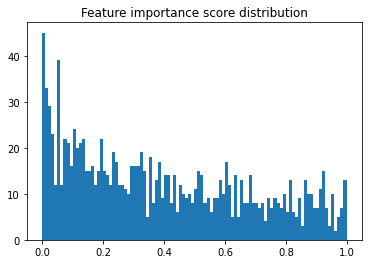

In [26]:
fig, ax = plt.subplots()
plt.hist(np.array(pval_sorted),bins=100)
#ax.plot([t63, t63], [0, 8], 'r--')
#ax.annotate('top 63 features reaching score of >={:.2f}'.format(t63), xy=(t63+1, 8), xytext=(t63+1, 8))
plt.title('Feature importance score distribution')
#plt.xlabel('Feature importance score')
#plt.ylabel('Number of features')
#plt.savefig('..\\figures\\anova_hist_cropped.svg', format='svg')
#plt.ylim(top=10)
plt.show()

In [27]:
s.index.tolist().index('Hlgap / eV')

36

In [33]:
scores_sorted1, cls1 = zip(*sorted(zip(skb.scores_, X_perm.columns), reverse=True))

In [34]:
scores_sorted1

(21.921350745543165,
 20.93886103538587,
 20.541342198484266,
 19.66071148559752,
 16.379314165360057,
 16.073146401707717,
 14.885438444741204,
 13.096912454130864,
 12.083734691351241,
 11.037984736637698,
 10.781440791530683,
 9.967987510703779,
 9.878952958838005,
 9.853231326628135,
 9.779626323444813,
 9.761166457715726,
 9.616017341462376,
 9.375808058499917,
 9.05355071248243,
 8.992887053155716,
 8.886471872094763,
 8.835478277450468,
 8.626487413288157,
 8.560061534053661,
 8.507378394419025,
 8.474421324250219,
 8.434440354497296,
 8.086600253933991,
 8.060233025148829,
 7.998301968340477,
 7.970904074510039,
 7.909503204624613,
 7.673569154140658,
 7.623032447414677,
 7.621256145815407,
 7.604653315452647,
 7.521107631362952,
 7.497421493918278,
 7.380416562121909,
 7.347549174060079,
 7.280878698788178,
 7.265484895059026,
 7.222890608278996,
 7.193066731978017,
 7.152240513046259,
 7.100097600035183,
 7.053188312698379,
 6.907214564198449,
 6.874407954989002,
 6.843014770